# PyTorch Workflow 

Let's explore an example PyTorch end to end workflow



In [149]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build the model",
                      3: "fitting the model to the data(infrences)",
                      4: "Evaluate the model",
                      5: "saving and loading the model",
                      6: "putting it all together"}
                      
what_were_covering

{1: 'data (prepare and load)',
 2: 'build the model',
 3: 'fitting the model to the data(infrences)',
 4: 'Evaluate the model',
 5: 'saving and loading the model',
 6: 'putting it all together'}

In [150]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#check the PyTorch verison
print(torch.__version__)

1.11.0+cu113


## 1. Data (Preparing and Loading)

Data can be almost anything.... in machine learining 

* Excel Spreadsheet
* Images of any kind
* videos 
* Audio
* DNA
* Text 

Machine Learining is game of two parts:

1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.


To showcase this, let's create some know data using the linear regression formula 

we'll use a linear regression formula to make a straight line with known parameters.


In [151]:
# Create *known* parameters 

weight = 0.7
bias = 0.3

# Create 
start = 0 
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim = 1)
Y = weight * X + bias

In [152]:
X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [153]:
len(X), len(Y)

(50, 50)

In [154]:
### Spliting data into training and tests sets (one of the most important concepts in machine learning in general)

train_split = int(0.8* len(X))
train_split

40

In [155]:
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]


In [156]:
# How might we bettwe visualize our data?
def plot_prediction(train_data = X_train,
                    train_labels = Y_train,
                    test_data = X_test,
                    test_labels = Y_test,
                    predictions = None):

    """

    Plots training data, test data and compares predictions,
    """

    plt.figure(figsize = (10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c = "b", s=4, label = "Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label= "Predictions")

    #show the legend
    plt.legend(prop= {"size":14 })

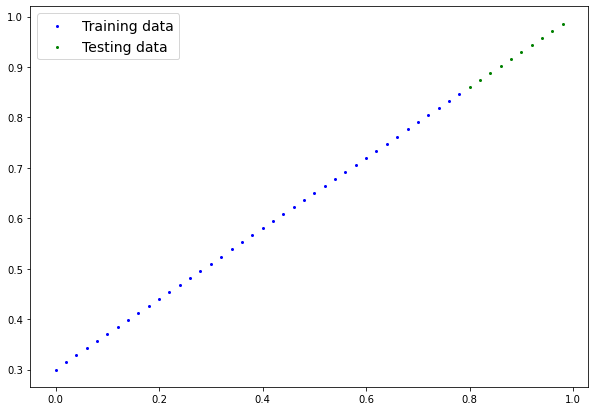

In [157]:
plot_prediction();

What are model does:
* Start with random values(weight and bias)
* Look at the training data and adjust the random values to better represent (or get closer to ) the ideal values (the weight & bias values we used to create the data)

How does it do si?

Through two main algorithms:
1. Gradient descent 
2. Back propgatation

## 2. Build model

In [158]:
import torch
from torch import nn

## 2. Build model
# Create linear regression model class
class LinearRegressionModel(nn.Module):  # <- almost everything in PyTorch inherits from nn.module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                                requires_grad = True, # <- can this parameter be updated via gradient descent?
                                                dtype = torch.float)) # <- PyTorch loves the datatype torch.float32

        self.bias = nn.Parameter(torch.randn(1,  # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad = True, # <- can this parameter be updated via gradient descent?
                                            dtype = torch.float)) # <- PyTorch loves the datatype torch.float32

        # forward method to define the computation in the model 
    def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data 
        return self.weights *x + self.bias   # This is the linear regression formula 

        

### PyTorch model building essentials 

* torch.nn -- contaons all of the buildings for computational graphs(a neural network can be considered a computational graph)
* torch.nn.Parameter -- what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us 
* torch.nn.module -- the base class for all neural network module, if you subclass it, you should overwrite forward()
* torch.optim -- this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() -- All nn.module subclasses require you to overwrite forward(), this method defines what happens in the forward computations 


### Checking the contents of our PyTorch model 

Now we've created a model, let's see what's inside..

so we can check our model parameters or what's inside our model using `.parameters()`

In [159]:
# Create a random seed

torch.manual_seed(42)

# Create an Instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the Prarmeters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [160]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [161]:
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

when we pass data through our model, it's going to run it through the forward() method

In [162]:
X_test, Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [163]:
y_preds  = model_0(Y_test)
y_preds

tensor([[0.4184],
        [0.4231],
        [0.4278],
        [0.4325],
        [0.4372],
        [0.4419],
        [0.4466],
        [0.4514],
        [0.4561],
        [0.4608]], grad_fn=<AddBackward0>)

In [164]:
# Make predictions with model 
with torch.inference_mode():   # while doing prediction inference mode turns off the gradient tracking, because when we are doing inference 
    y_preds = model_0(X_test)  # we are not doing traning, we don't need to track of to update our model 

y_preds

# You can aslo do the similar thing with torch.no_grad(), however, torhc.inference_mode() is preferred
# with torch.no_grad():
#     y_preds = model_0(X_test)

# y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

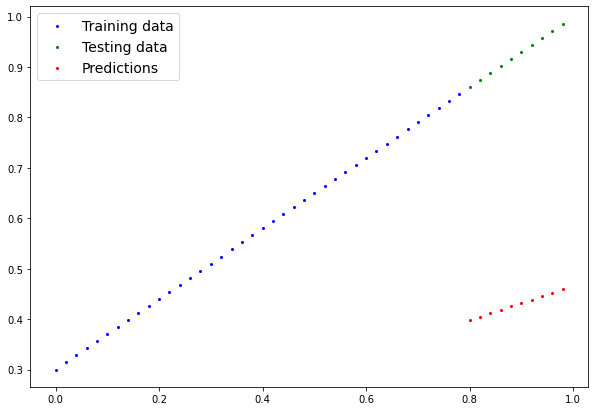

In [165]:
plot_prediction(predictions=y_preds)

## 3. Train model 

The whole idea of training is for a model to move from some *unknwown* parameters (These may be random ) to some *know* paramteres.

or in other words form a poor representation of the data to a better representation of the data.

one way to measure how poor your model predictions are is ot use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predicitons are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's paramters(e.g. weight and bias in our case) to improve the loss function.

        - Inside the optimizer you'll often have to set two parameters:
         *Params* - the model parameters you'd like to optimize, for example **params=model_0.parameters()**
         - lr -(learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters.
                                with each step (a small lr results in small changes, a large results in large changes)
And specifically for PyTorch, we need:
* A training loop 
* A testing loop




In [166]:
model_0.parameters()

<generator object Module.parameters at 0x000001BD2FB8F5F0>

In [167]:
# Check ou tthe model's parameters ( a parameters is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [168]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)  # Learning rate = possibly the most important hyperparameter you can set
                            

### Building a trainin loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data 
1. Forward pass ( this involves data moving throug our model's `forward()` functions) to make predictions on data - also called forward propgation
2. Calculate the loss (compare forward pass predicitons to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backward through the network to calculate the gradients of each of the parameters of our model wuth respect to the loss.
5. Optimizer step - use the optimizer to adjust our model's  parameters to try and imporve the loss (**gradient descent**)


In [169]:
# An epochs is one loop through the data..
epochs = 200

# track different values
epoch_count =[]
loss_values = []
test_loss_values = []


### Training 
# 0. Loop through the data
for epoch in range (epochs):
    # Set the model to training mode 
    model_0.train() # train mode in Pytorch sets all parameters to require gradients to require gradients

    # 1. Forward pass
    y_preds = model_0(X_train)

    # 2. calculate the loss
    loss = loss_fn(y_preds, Y_train)
    
    #3. optimizer zero grad
    optimizer.zero_grad()

    #.4 Perform backpropgation on the loss with respect to the pararmeters of the model 
    loss.backward()

    #5. Step the optimizer(perform gradient descent)
    optimizer.step() # By default how the optizmier changes will acculumate through the loop so... we have to zero them above in step 3 for the next itteration of the loop

    ### Testing 
    model_0.eval()  # turns off gradient tracking
    with torch.inference_mode():  # turns off the gradient tracking & a couple more things behind the scences
    # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. calculate the loss
        test_loss = loss_fn(test_pred, Y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | loss: {loss} | Test loss: {test_loss}")

        # print out model state dict
        model_0.state_dict()

Epoch: 0 | loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

In [170]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [171]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

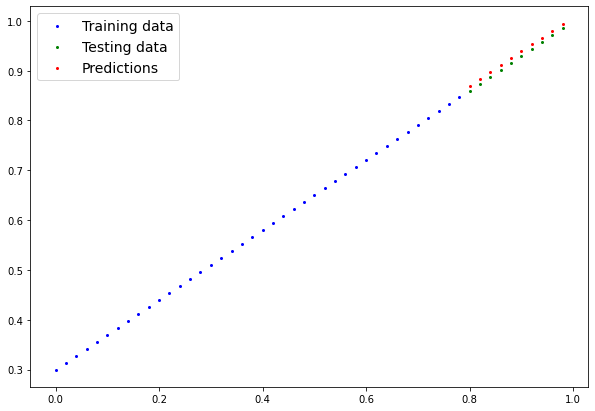

In [172]:
plot_prediction(predictions=y_preds_new)

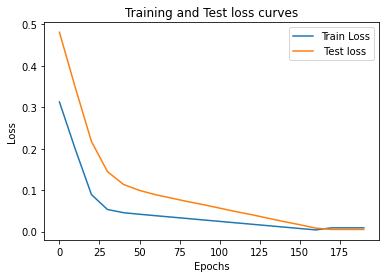

In [173]:
 import numpy as np
 #np.array(torch.tensor(loss_values).cpu().numpy()),np.array(test_loss_values)
 
 # Plot the loss curves 
 plt.plot(epoch_count,  np.array(torch.tensor(loss_values).cpu().numpy()), label = "Train Loss")
 plt.plot(epoch_count, test_loss_values, label =" Test loss")
 plt.title("Training and Test loss curves")
 plt.ylabel("Loss")
 plt.xlabel("Epochs")
 plt.legend()

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `troch.save()` - allows you save a PyTorch object in python's pickle format 
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [174]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [175]:
# Saving our PyTorch model 
from pathlib import Path

# 1. Create the model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok= True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
 
MODEL_SAVE_PATH

# 3. Save the Model state dict 
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH   )

saving model to: models\01_pytorch_workflow_model_0.pth


## Loading a PyTorch Model 

Since we saved our model's `state_dict()` rather than entire model, we'll create a new instance of our model class and load the saved `sate_dict()` into that.

In [176]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [177]:
# To load in a saved state_dict we have to instantiate a new instance of our model class 
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict() of model_0 (This will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [178]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [179]:
# Make some predictions with our loaded model 
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [181]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [182]:
# Compare loaded model preds with original model preds 
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])